In [ ]:
import pandas as pd

In [ ]:
#URLs from github
url1 = 'https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/politifact_fake.csv'
url2 = 'https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/politifact_real.csv'
url3 = 'https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_fake.csv'
url4 = 'https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_real.csv'

In [ ]:
#Import Politifact+Gossipcop
df_polifake = pd.read_csv(url1)
df_polifact = pd.read_csv(url2)
df_gcfake = pd.read_csv(url3)
df_gcfact = pd.read_csv(url4)

In [ ]:
#Install Kaggle API. Makes it easier to import data directly from Kaggle, instead of importing from computer
! mkdir ~/.kaggle

In [ ]:
#Install Kaggle API.
! pip install kaggle

In [ ]:
#Install Kaggle API. Need kaggle.json file. Instructions: https://www.kaggle.com/general/74235
! cp kaggle.json ~/.kaggle/

In [ ]:
#Install Kaggle API.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download Kaggle1 directly from Kaggle.com
! kaggle competitions download -c fake-news

 94% 35.0M/37.0M [00:00<00:00, 60.4MB/s]
100% 37.0M/37.0M [00:00<00:00, 93.5MB/s]
 74% 7.00M/9.42M [00:00<00:00, 29.1MB/s]
100% 9.42M/9.42M [00:00<00:00, 27.1MB/s]
  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 38.1MB/s]


In [ ]:
#Download Kaggle2 directly from Kaggle.com
! kaggle datasets download jruvika/fake-news-detection

  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 77.8MB/s]


In [ ]:
#Unzip Kaggle 1 folder
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
#Unzip Kaggle 2 folder
!unzip /content/fake-news-detection.zip

Archive:  /content/fake-news-detection.zip
  inflating: data.csv                
  inflating: data.h5                 


In [ ]:
#Import both Kaggle1+2
kaggle2 = pd.read_csv("data.csv")
kaggle1 = pd.read_csv("train.csv")
kaggle1.info()
kaggle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
#Copy datasets - so I still retain the original dataset, and can refer back to the original if needed
df_kag1 = kaggle1.copy()
df_kag2 = kaggle2.copy()
df_pfake = df_polifake.copy()
df_pfact = df_polifact.copy()
df_gfake = df_gcfake.copy()
df_gfact = df_gcfact.copy()

In [ ]:
#Add labels to PG datasets
df_pfake['label'] = 1
df_pfact['label'] = 0
df_gfake['label'] = 1
df_gfact['label'] = 0

In [ ]:
#Change column names for Kaggle2
df_kag2 = df_kag2.rename(columns={'Headline':'title','Label':'label'})
df_kag2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URLs    4009 non-null   object
 1   title   4009 non-null   object
 2   Body    3988 non-null   object
 3   label   4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
#Remove nulls from 'title' in Kaggle1
df_kag1 = df_kag1[df_kag1['title'].notna()]
df_kag1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   author  18285 non-null  object
 3   text    20203 non-null  object
 4   label   20242 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 948.8+ KB


In [ ]:
#Merge datasets
df_union1 = pd.concat([df_pfake, df_pfact, df_gfake, df_gfact, df_kag1, 
                       df_kag2], ignore_index=True)
df_union1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47447 entries, 0 to 47446
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         43438 non-null  object
 1   news_url   22866 non-null  object
 2   title      47447 non-null  object
 3   tweet_ids  21695 non-null  object
 4   label      47447 non-null  int64 
 5   author     18285 non-null  object
 6   text       20203 non-null  object
 7   URLs       4009 non-null   object
 8   Body       3988 non-null   object
dtypes: int64(1), object(8)
memory usage: 3.3+ MB


In [ ]:
#Drop features not being used: 'news_url','tweet_ids','author','text','URLs','Body'
features_dropped = ['news_url','tweet_ids','author','text','URLs','Body']
df_union1 = df_union1.drop(features_dropped, axis=1)
df_union1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47447 entries, 0 to 47446
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43438 non-null  object
 1   title   47447 non-null  object
 2   label   47447 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
#Data Before Preprocessing
df_union1.head()

,id,title,label
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...,1
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...,1
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...,1
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide,1
4,politifact15371,Trump Votes For Death Penalty For Being Gay,1


In [ ]:
#Import NLTK libraries. Used for data preprocessing.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Data preprocessing: stop words, tokenize, stemming
ps = PorterStemmer()
def stop_stem(text):
    text = re.sub('[^a-zA-Z]', ' ',text) #SYMBOLS: this basically replaces everything other than lower a-z & upper A-Z with a ' ', for eg apple,bananna --> apple bananna
    text = text.lower() #LOWERCASE
    text = text.split() #TOKENIZE: .split() splits the line into words with delimiter as ' '
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')] #STEM: basically remove all the stopwords and apply stemming to the final data
    text = ' '.join(text) # this basically joins back and returns the cleaned sentence
    return text

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df_union1['title'] = df_union1['title'].(stop_stem)apply

In [ ]:
df_union1.head()
#Data After Preprocessing

,id,title,label
0,politifact15014,break first nfl team declar bankruptci kneel thug,1
1,politifact15156,court order obama pay million restitut,1
2,politifact14745,updat second roy moor accus work michel obama ...,1
3,politifact14355,oscar pistoriu attempt commit suicid,1
4,politifact15371,trump vote death penalti gay,1


In [ ]:
#Independent variable: 'title'; Dependent variable: 'label'
X = df_union1['title']
Y = df_union1['label']

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df_union1['title'])
X.shape

(47447, 21254)

In [ ]:
#Split the entire dataset into training and test set, 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
#Split the training set into training2 and validation, 70:30
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [ ]:
#Create metrics table for VALIDATION set. 
#Training Set Results: Shows how well model performs on the training data. Initial test for the model to get a feel for the data. 
#Validation Set Results: More important - shows how generalizable the data is. This is reflective of how the model will perform in the wild. 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate1(model, x_train2, x_val, y_train2, y_val):
    y_train_pred = model.predict(x_train2)
    y_test_pred = model.predict(x_val)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train2, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train2, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train2, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("VALIDATION SET RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_val, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_val, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_val, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#Logistic Regression - Train-Validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
#Fitting training set to the model
lr.fit(x_train2,y_train2)
#Metrics report
evaluate1(lr, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[15825  1000]
 [ 2094  7650]]
ACCURACY SCORE:
0.8835
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.883141     0.884393  0.883548      0.883767      0.883600
recall         0.940565     0.785099  0.883548      0.862832      0.883548
f1-score       0.910949     0.831793  0.883548      0.871371      0.881919
support    16825.000000  9744.000000  0.883548  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6442  704]
 [1353 2889]]
ACCURACY SCORE:
0.8194
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.826427     0.804063  0.819371      0.815245      0.818097
recall        0.901483     0.681047  0.819371      0.791265      0.819371
f1-score      0.862325     0.737460  0.819371      0.799893      0.815813
support    7146.000000  4242.000000  0.819371  11388.000000  11388.000000


In [ ]:
#Support Vector Machine - Train-Validate
from sklearn.svm import SVC
svm = SVC()
#Fitting training set to the model
svm.fit(x_train2,y_train2)
#Metrics report
evaluate1(svm, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[16625   200]
 [  499  9245]]
ACCURACY SCORE:
0.9737
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.970860     0.978825  0.973691      0.974842      0.973781
recall         0.988113     0.948789  0.973691      0.968451      0.973691
f1-score       0.979410     0.963573  0.973691      0.971492      0.973602
support    16825.000000  9744.000000  0.973691  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6511  635]
 [1215 3027]]
ACCURACY SCORE:
0.8375
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.842739     0.826597  0.837548      0.834668      0.836726
recall        0.911139     0.713579  0.837548      0.812359      0.837548
f1-score      0.875605     0.765941  0.837548      0.820773      0.834756
support    7146.000000  4242.000000  0.837548  11388.000000  11388.000000


In [ ]:
#K-Nearest Neighbors - Train-Validate
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
#Fitting training set to the model
knn.fit(x_train2,y_train2)
#Metrics report
evaluate1(knn, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 6329 10496]
 [  495  9249]]
ACCURACY SCORE:
0.5863
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.927462     0.468422  0.586322      0.697942      0.759112
recall         0.376166     0.949200  0.586322      0.662683      0.586322
f1-score       0.535245     0.627285  0.586322      0.581265      0.569000
support    16825.000000  9744.000000  0.586322  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[1298 5848]
 [ 275 3967]]
ACCURACY SCORE:
0.4623
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.825175     0.404177  0.462329      0.614676      0.668354
recall        0.181640     0.935172  0.462329      0.558406      0.462329
f1-score      0.297741     0.564416  0.462329      0.431078      0.397077
support    7146.000000  4242.000000  0.462329  11388.000000  11388.000000


In [ ]:
#Voting ensemble - Train-Validate
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(('Logistic', lr))

estimators.append(('SVM', svm))

estimators.append(('KNN', knn))

voting = VotingClassifier(estimators=estimators)
voting.fit(x_train2, y_train2)

evaluate1(voting, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[16066   759]
 [  617  9127]]
ACCURACY SCORE:
0.9482
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.963016     0.923225   0.94821      0.943121      0.948423
recall         0.954889     0.936679   0.94821      0.945784      0.948210
f1-score       0.958935     0.929903   0.94821      0.944419      0.948288
support    16825.000000  9744.000000   0.94821  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6413  733]
 [1161 3081]]
ACCURACY SCORE:
0.8337
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.846712     0.807813  0.833685      0.827263      0.832223
recall        0.897425     0.726308  0.833685      0.811867      0.833685
f1-score      0.871332     0.764896  0.833685      0.818114      0.831684
support    7146.000000  4242.000000  0.833685  11388.000000  11388.000000


In [ ]:
#AUC-ROC curve setup - Soft voting
voting2 = VotingClassifier(estimators=estimators, voting='soft')
voting2.fit(x_train2, y_train2)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0...
                                  decision_function_shape='ovr', degree=3,
                                  g

In [ ]:
#AUC-ROC curve setup - Create probability prediction 
y_pred_logistic = lr.decision_function(x_val)
y_pred_svm = svm.decision_function(x_val)
y_pred_knn = knn.predict_proba(x_val)
y_pred_vote = voting2.predict_proba(x_val)

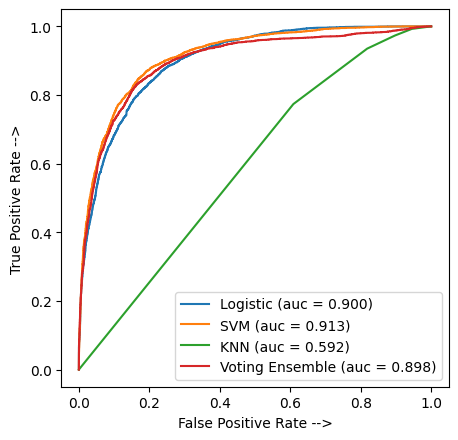

In [ ]:
#AUC-ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_val, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_val, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_val, y_pred_knn[:,1])
auc_knn = auc(knn_fpr, knn_tpr)

vote_fpr, vote_tpr, threshold = roc_curve(y_val, y_pred_vote[:,1])
auc_vote = auc(vote_fpr, vote_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(vote_fpr, vote_tpr, linestyle='-', label='Voting Ensemble (auc = %0.3f)' % auc_vote)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
#Parameter tuning - GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logistic Regression - hyperparameter options
lr_param = {  
  'solver':['liblinear'],
  'C': [0.001,0.01,0.1,1,10,100],
  'penalty': ['l1','l2']
}

In [ ]:
'''
#WARNING - LONG PROCESSING TIME
#Logistic Regression - optimal parameters
lr_grid = GridSearchCV(lr,lr_param)
lr_grid.fit(x_train2,y_train2)
lr_grid.best_estimator_
'''

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#SVM - hyperparameter options
svm_param = {
  'C': [0.1, 1, 10, 100, 1000], 
  'gamma': [1, 0.1, 0.01, 0.001],
  'kernel': ['rbf']
}

In [ ]:
'''
#WARNING - LONG PROCESSING TIME
#SVM - optimal parameters
svm_grid = GridSearchCV(svm,svm_param,refit = True, verbose = 3)
svm_grid.fit(x_train2,y_train2)
svm_grid.best_estimator_
'''

In [ ]:
#KNN - hyperparameter options
knn_param = {
  'n_neighbors': list(range(1,15)),
  'leaf_size': list(range(1,5)),
  'p': [1,2]
}

In [ ]:
'''
#WARNING - LONG PROCESSING TIME
#KNN - optimal parameters
knn_grid = GridSearchCV(knn,knn_param)
knn_grid.fit(x_train2,y_train2)
knn_grid.best_estimator_
'''

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
#OPTIMIZED - logistic regression
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=10, solver='liblinear', penalty='l2')
#Fitting training set to the model
lr2.fit(x_train2,y_train2)
#Metrics report
evaluate1(lr2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[16142   683]
 [  922  8822]]
ACCURACY SCORE:
0.9396
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.945968     0.928143  0.939591      0.937056      0.939431
recall         0.959406     0.905378  0.939591      0.932392      0.939591
f1-score       0.952639     0.916619  0.939591      0.934629      0.939429
support    16825.000000  9744.000000  0.939591  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6223  923]
 [1078 3164]]
ACCURACY SCORE:
0.8243
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.852349     0.774162  0.824289      0.813255      0.823225
recall        0.870837     0.745875  0.824289      0.808356      0.824289
f1-score      0.861494     0.759755  0.824289      0.810624      0.823596
support    7146.000000  4242.000000  0.824289  11388.000000  11388.000000


In [ ]:
#OPTIMIZED - SVM
from sklearn.svm import SVC
svm2 = SVC(C=100, gamma=1, kernel='rbf')
#Fitting training set to the model
svm2.fit(x_train2,y_train2)
#Metrics report
evaluate1(svm2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[16800    25]
 [   35  9709]]
ACCURACY SCORE:
0.9977
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.997921     0.997432  0.997742      0.997676      0.997742
recall         0.998514     0.996408  0.997742      0.997461      0.997742
f1-score       0.998217     0.996920  0.997742      0.997569      0.997741
support    16825.000000  9744.000000  0.997742  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6389  757]
 [1072 3170]]
ACCURACY SCORE:
0.8394
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.856320     0.807232  0.839392      0.831776      0.838035
recall        0.894067     0.747289  0.839392      0.820678      0.839392
f1-score      0.874786     0.776105  0.839392      0.825445      0.838028
support    7146.000000  4242.000000  0.839392  11388.000000  11388.000000


In [ ]:
#OPTIMIZED - KNN (gridsearchcv)
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=11, p=2)
#Fitting training set to the model
knn2.fit(x_train2,y_train2)
#Metrics report
evaluate1(knn2, x_train2, x_val, y_train2, y_val)

In [ ]:
#OPTIMIZED - KNN (initial hyperparameters)
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(leaf_size=1, n_neighbors=4, p=2)
#Fitting training set to the model
knn3.fit(x_train2,y_train2)
#Metrics report
evaluate1(knn3, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[ 6329 10496]
 [  495  9249]]
ACCURACY SCORE:
0.5863
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.927462     0.468422  0.586322      0.697942      0.759112
recall         0.376166     0.949200  0.586322      0.662683      0.586322
f1-score       0.535245     0.627285  0.586322      0.581265      0.569000
support    16825.000000  9744.000000  0.586322  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[1298 5848]
 [ 275 3967]]
ACCURACY SCORE:
0.4623
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.825175     0.404177  0.462329      0.614676      0.668354
recall        0.181640     0.935172  0.462329      0.558406      0.462329
f1-score      0.297741     0.564416  0.462329      0.431078      0.397077
support    7146.000000  4242.000000  0.462329  11388.000000  11388.000000


In [ ]:
#OPTIMIZED - Voting ensemble
from sklearn.ensemble import VotingClassifier

estimators1 = []
estimators1.append(('Logistic', lr2))

estimators1.append(('SVM', svm2))

estimators1.append(('KNN', knn3))

voting2 = VotingClassifier(estimators=estimators1)
voting2.fit(x_train2, y_train2)

evaluate1(voting2, x_train2, x_val, y_train2, y_val)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[16376   449]
 [  210  9534]]
ACCURACY SCORE:
0.9752
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.987339     0.955024  0.975197      0.971181      0.975487
recall         0.973314     0.978448  0.975197      0.975881      0.975197
f1-score       0.980276     0.966594  0.975197      0.973435      0.975258
support    16825.000000  9744.000000  0.975197  26569.000000  26569.000000
VALIDATION SET RESULTS: 
CONFUSION MATRIX:
[[6211  935]
 [ 963 3279]]
ACCURACY SCORE:
0.8333
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.865765     0.778121  0.833333      0.821943      0.833118
recall        0.869158     0.772984  0.833333      0.821071      0.833333
f1-score      0.867458     0.775544  0.833333      0.821501      0.833220
support    7146.000000  4242.000000  0.833333  11388.000000  11388.000000


In [ ]:
#FINAL TEST - create metrics table

def evaluate_final(model, x_train, x_test, y_train, y_test):
    y_test_pred = model.predict(x_test)

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#FINAL TEST - LR

lr_final = LogisticRegression(C=10, solver='liblinear', penalty='l2')
#Fitting training set to the model
lr_final.fit(x_train,y_train)
#Metrics report
evaluate_final(lr_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[5286  708]
 [ 842 2654]]
ACCURACY SCORE:
0.8367
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.862598     0.789411   0.83667     0.826004      0.835637
recall        0.881882     0.759153   0.83667     0.820518      0.836670
f1-score      0.872133     0.773987   0.83667     0.823060      0.835977
support    5994.000000  3496.000000   0.83667  9490.000000   9490.000000


In [ ]:
#FINAL TEST - SVM

svm_final = SVC(C=100, gamma=1, kernel='rbf', probability=True)
#Fitting training set to the model
svm_final.fit(x_train,y_train)
#Metrics report
evaluate_final(svm_final, x_train, x_test, y_train, y_test)

NameError: ignored

In [ ]:
#FINAL TEST - KNN

knn_final = KNeighborsClassifier(leaf_size=1, n_neighbors=4, p=2)
#Fitting training set to the model
knn_final.fit(x_train,y_train)
#Metrics report
evaluate_final(knn_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[1373 4621]
 [ 257 3239]]
ACCURACY SCORE:
0.4860
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.842331     0.412087  0.485985     0.627209      0.683834
recall        0.229062     0.926487  0.485985     0.577775      0.485985
f1-score      0.360178     0.570447  0.485985     0.465313      0.437639
support    5994.000000  3496.000000  0.485985  9490.000000   9490.000000


In [ ]:
#FINAL TEST - Voting

estimators2 = []
estimators2.append(('Logistic', lr_final))

estimators2.append(('SVM', svm_final))

estimators2.append(('KNN', knn_final))

voting_final = VotingClassifier(estimators=estimators)
voting_final.fit(x_train, y_train)

evaluate_final(voting_final, x_train, x_test, y_train, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[5411  583]
 [ 825 2671]]
ACCURACY SCORE:
0.8516
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.867704     0.820836  0.851633     0.844270      0.850438
recall        0.902736     0.764016  0.851633     0.833376      0.851633
f1-score      0.884873     0.791407  0.851633     0.838140      0.850442
support    5994.000000  3496.000000  0.851633  9490.000000   9490.000000


In [ ]:
#FINAL AUC-ROC curve setup - Soft voting
voting3 = VotingClassifier(estimators=estimators2, voting='soft')
voting3.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, co...
                                  decision_function_shape='ovr', degree=3,
                                  g

In [ ]:
#FINAL AUC-ROC curve setup - Create probability prediction 
y_pred_logistic1 = lr_final.decision_function(x_test)
y_pred_svm1 = svm_final.decision_function(x_test)
y_pred_knn1 = knn_final.predict_proba(x_test)
y_pred_vote1 = voting3.predict_proba(x_test)

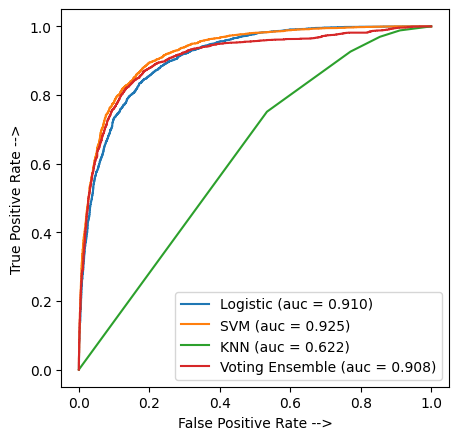

In [ ]:
#FINAL AUC-ROC curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#LR - create curve
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic1)
auc_logistic_final = auc(logistic_fpr, logistic_tpr)
#SVM - create curve
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm1)
auc_svm_final = auc(svm_fpr, svm_tpr)
#KNN - create curve
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn1[:,1])
auc_knn_final = auc(knn_fpr, knn_tpr)
#Vote - create curve
vote_fpr, vote_tpr, threshold = roc_curve(y_test, y_pred_vote1[:,1])
auc_vote_final = auc(vote_fpr, vote_tpr)

#Plot curves
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic (auc = %0.3f)' % auc_logistic_final)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm_final)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn_final)
plt.plot(vote_fpr, vote_tpr, linestyle='-', label='Voting Ensemble (auc = %0.3f)' % auc_vote_final)

#Create axes 
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

#Show legend
plt.legend()

plt.show()